In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

#seaborn
import seaborn as sns

#json
import json

In [2]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data mining_fundamentals/K-means_clustering'

In [3]:
df = pd.read_csv("Numerical_Normalized_Train_HR_Employee_Attrition.csv")

In [4]:
df.head()

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0  0.809524          0.285714       0.286171           0.428571   
1  0.428571          0.000000       0.147183           0.214286   
2  0.166667          0.535714       0.144644           1.000000   
3  0.357143          0.142857       0.068878           0.214286   
4  0.309524          0.285714       0.204325           0.071429   

   StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
0          0.000000               0.333333            0.40   
1          0.333333               0.500000            0.05   
2          0.333333               0.666667            0.05   
3          0.000000               0.166667            0.15   
4          0.000000               0.333333            0.50   

   YearsInCurrentRole  MonthlyHours  Attrition  OverTime  OverallSatisfaction  \
0              0.4375      0.231122        0.0       0.0             0.333333   
1              0.5000      0.233476        0.0       1.0             0.333333   
2              0.3125      0.747017        0.0       1.0             0.666667   
3              0.4375      0.435214        0.0       0.0             0.333333   
4              0.1250      0.142192        0.0       0.0             0.666667   

   JobLevel  NumCompaniesWorked  Education  
0      0.50            1.000000       0.75  
1      1.00            0.111111       0.00  
2      0.25            0.111111       0.50  
3      0.00            0.222222       0.75  
4      0.00            0.111111       0.25

In [5]:
del df['Attrition']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   OverTime               883 non-null    float64
 10  OverallSatisfaction    883 non-null    float64
 11  JobLevel               883 non-null    float64
 12  NumCompaniesWorked     883 non-null    float64
 13  Education              883 non-null    float64
dtypes: float64(14)
memory usage: 96.7 KB


In [7]:
df

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0    0.809524          0.285714       0.286171           0.428571   
1    0.428571          0.000000       0.147183           0.214286   
2    0.166667          0.535714       0.144644           1.000000   
3    0.357143          0.142857       0.068878           0.214286   
4    0.309524          0.285714       0.204325           0.071429   
..        ...               ...            ...                ...   
878  0.476190          0.392857       0.166769           0.285714   
879  0.452381          0.535714       0.042558           0.142857   
880  0.357143          0.178571       0.159227           0.500000   
881  0.357143          0.107143       0.057373           0.071429   
882  0.642857          0.071429       0.129906           0.357143   

     StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
0            0.000000               0.333333            0.40   
1            0.333333               0.500000            0.05   
2            0.333333               0.666667            0.05   
3            0.000000               0.166667            0.15   
4            0.000000               0.333333            0.50   
..                ...                    ...             ...   
878          0.000000               0.333333            0.50   
879          0.666667               0.500000            0.85   
880          0.000000               0.333333            0.55   
881          0.000000               0.333333            0.15   
882          0.000000               0.333333            0.50   

     YearsInCurrentRole  MonthlyHours  OverTime  OverallSatisfaction  \
0                0.4375      0.231122       0.0             0.333333   
1                0.5000      0.233476       1.0             0.333333   
2                0.3125      0.747017       1.0             0.666667   
3                0.4375      0.435214       0.0             0.333333   
4                0.1250      0.142192       0.0             0.666667   
..                  ...           ...       ...                  ...   
878              0.0000      0.453907       0.0             0.666667   
879              0.0000      0.088947       1.0             0.666667   
880              0.4375      0.436931       1.0             0.333333   
881              0.1250      0.323273       0.0             0.333333   
882              0.2500      0.325150       1.0             0.333333   

     JobLevel  NumCompaniesWorked  Education  
0        0.50            1.000000       0.75  
1        1.00            0.111111       0.00  
2        0.25            0.111111       0.50  
3        0.00            0.222222       0.75  
4        0.00            0.111111       0.25  
..        ...                 ...        ...  
878      0.00            0.111111       0.50  
879      0.00            0.111111       0.25  
880      0.25            0.444444       0.75  
881      0.25            0.111111       0.00  
882      0.25            0.333333       0.75  

[883 rows x 14 columns]

In [8]:
df.describe()

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
count  883.000000        883.000000     883.000000         883.000000   
mean     0.441784          0.292914       0.227927           0.300518   
std      0.196813          0.294351       0.209842           0.256381   
min      0.000000          0.000000       0.000000           0.000000   
25%      0.285714          0.035714       0.079383           0.071429   
50%      0.404762          0.214286       0.156611           0.214286   
75%      0.571429          0.464286       0.301351           0.500000   
max      1.000000          1.000000       1.000000           1.000000   

       StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
count        883.000000             883.000000      883.000000   
mean           0.264628               0.444319        0.316308   
std            0.288454               0.197971        0.226178   
min            0.000000               0.000000        0.000000   
25%            0.000000               0.333333        0.150000   
50%            0.333333               0.333333        0.250000   
75%            0.333333               0.500000        0.450000   
max            1.000000               1.000000        1.000000   

       YearsInCurrentRole  MonthlyHours    OverTime  OverallSatisfaction  \
count          883.000000    883.000000  883.000000           883.000000   
mean             0.244975      0.368545    0.277463             0.440921   
std              0.214712      0.230461    0.448001             0.178532   
min              0.000000      0.000000    0.000000             0.000000   
25%              0.125000      0.185135    0.000000             0.333333   
50%              0.187500      0.329663    0.000000             0.333333   
75%              0.437500      0.502469    1.000000             0.666667   
max              1.000000      1.000000    1.000000             1.000000   

         JobLevel  NumCompaniesWorked   Education  
count  883.000000          883.000000  883.000000  
mean     0.229898            0.315213    0.471687  
std      0.251877            0.276110    0.252071  
min      0.000000            0.000000    0.000000  
25%      0.000000            0.111111    0.250000  
50%      0.250000            0.222222    0.500000  
75%      0.250000            0.444444    0.750000  
max      1.000000            1.000000    1.000000

In [9]:
# Convert the DataFrame to a numpy array:
train_data = df.values

In [10]:
train_data

array([[0.80952381, 0.28571429, 0.28617054, ..., 0.5       , 1.        ,
        0.75      ],
       [0.42857143, 0.        , 0.14718332, ..., 1.        , 0.11111111,
        0.        ],
       [0.16666667, 0.53571429, 0.14464368, ..., 0.25      , 0.11111111,
        0.5       ],
       ...,
       [0.35714286, 0.17857143, 0.15922734, ..., 0.25      , 0.44444444,
        0.75      ],
       [0.35714286, 0.10714286, 0.05737263, ..., 0.25      , 0.11111111,
        0.        ],
       [0.64285714, 0.07142857, 0.12990611, ..., 0.25      , 0.33333333,
        0.75      ]])

In [11]:
type(train_data)

numpy.ndarray

<h3>K-means</h3>

We run the k-means algorithm with a range of k from 2 to 50 to find the optimal k, depending on four measures: Sum of Squared Error, Silhouette Score, Calinski-Harabaz Score and Davies-Bouldin Score.

* <b>Sum of Squared Error</b>
    Sum of squared distances of samples to their closest cluster center.

* <b>Silhouette Score</b>
    Compute the mean Silhouette Coefficient of all samples.
    The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
    This function returns the mean Silhouette Coefficient over all samples. 
    The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
    
* <b>Calinski and Harabasz score</b>
    It is also known as the Variance Ratio Criterion.
    The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.
    
* <b>Davies-Bouldin score</b>
   The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
    The minimum score is zero, with lower values indicating better clustering.

k:  2 SSE:  654.6160765772529 Silhouette Score:  0.2397842380914018 
 Calinski-Harabaz:  239.1994304110552 Davies-Bouldin:  1.6761020843902816

k:  3 SSE:  608.962529475332 Silhouette Score:  0.1498921936061127 
 Calinski-Harabaz:  161.40663048420643 Davies-Bouldin:  2.29262720976881

k:  4 SSE:  573.9761425960439 Silhouette Score:  0.13395137080713618 
 Calinski-Harabaz:  131.89330209365517 Davies-Bouldin:  2.3215510213900052

k:  5 SSE:  549.3463362626385 Silhouette Score:  0.12667098271032853 
 Calinski-Harabaz:  113.07867449783224 Davies-Bouldin:  2.194197043101208

k:  6 SSE:  530.645404347128 Silhouette Score:  0.12274336040931812 
 Calinski-Harabaz:  99.72578049442392 Davies-Bouldin:  2.095763705164059

k:  7 SSE:  514.3726573951894 Silhouette Score:  0.11378077738726557 
 Calinski-Harabaz:  90.25504274221161 Davies-Bouldin:  2.2145728889345526

k:  8 SSE:  499.6257785159743 Silhouette Score:  0.10766358222491211 
 Calinski-Harabaz:  83.24341681123883 Davies-Bouldin:  2.26877184

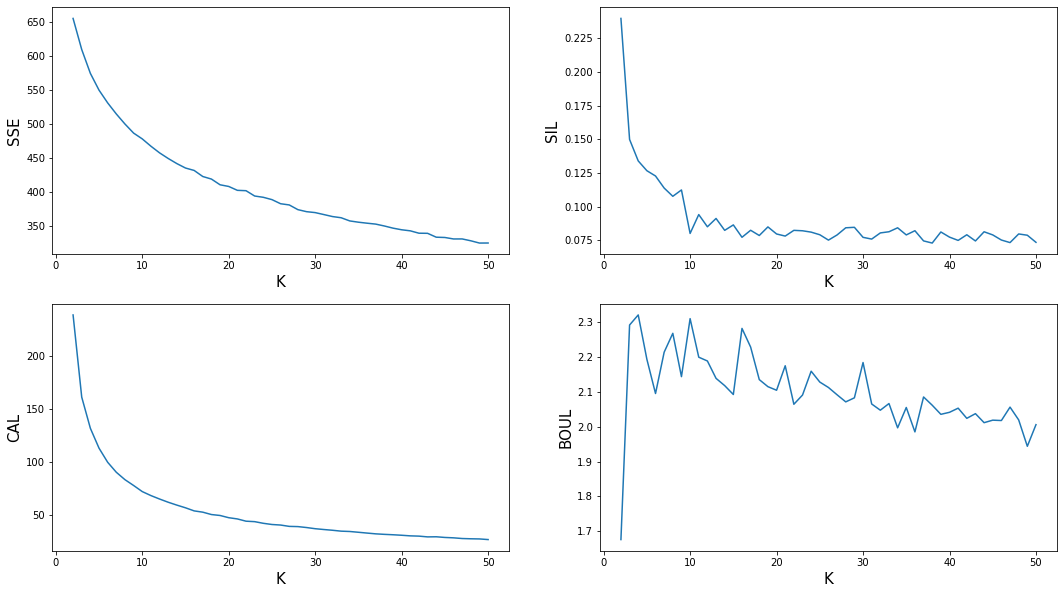

In [12]:
max_k = 50
sse_list = list()
silhouette = list()
calinski = list()
bouldin = list()
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
    
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, algorithm='full')
    kmeans.fit(train_data)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
    sil = silhouette_score(train_data, kmeans.labels_)
    silhouette.append(sil)
    
    cal = calinski_harabasz_score(train_data, kmeans.labels_)
    calinski.append(cal)
    
    boul = davies_bouldin_score(train_data, kmeans.labels_)
    bouldin.append(boul)
    
    print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil, "\n",
         "Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
    print()
        
ax[0, 0].plot(range(2, len(sse_list) + 2), sse_list)
ax[0, 0].set_ylabel('SSE', fontsize=15)
ax[0, 0].set_xlabel('K', fontsize=15)
    
ax[0, 1].plot(range(2, len(silhouette) + 2), silhouette)
ax[0, 1].set_ylabel('SIL', fontsize=15)
ax[0, 1].set_xlabel('K', fontsize=15)
    
ax[1, 0].plot(range(2, len(calinski) + 2), calinski)
ax[1, 0].set_ylabel('CAL', fontsize=15)
ax[1, 0].set_xlabel('K', fontsize=15)
    
ax[1, 1].plot(range(2, len(bouldin) + 2), bouldin)
ax[1, 1].set_ylabel('BOUL', fontsize=15)
ax[1, 1].set_xlabel('K', fontsize=15)
    
plt.show()
fig.tight_layout()

In [13]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', n_init=1000, max_iter=10000, algorithm='full')
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print()
print ('Labels: ', dict(zip(bins, hist)))
print()
print ('SSE: ', kmeans.inertia_)
print ('Silhouette Score: ', silhouette_score(train_data, kmeans.labels_))
print ("Calinski - Harabaz Score: ", calinski_harabasz_score(train_data, kmeans.labels_))
print ("Davies - Bouldin Score: ", davies_bouldin_score(train_data, kmeans.labels_))

centers [[ 4.41088435e-01  1.94285714e-01  2.05466699e-01  3.13061224e-01
   2.68571429e-01  4.68571429e-01  3.04000000e-01  2.43214286e-01
   3.62420080e-01 -2.22044605e-16  4.38095238e-01  3.28571429e-01
   6.86984127e-01  5.55714286e-01]
 [ 4.34402332e-01  2.82653061e-01  2.27676510e-01  2.84256560e-01
   2.61224490e-01  4.22448980e-01  3.25714286e-01  2.39030612e-01
   3.52137666e-01  1.00000000e+00  4.51700680e-01  2.39795918e-01
   2.91156463e-01  4.70408163e-01]
 [ 4.44519317e-01  1.38814016e-01  2.29359003e-01  3.20754717e-01
   2.34800839e-01  4.50209644e-01  3.14308176e-01  2.37224843e-01
   3.89568559e-01  1.66533454e-16  4.39203354e-01  1.70597484e-01
   1.59329140e-01  4.34748428e-01]
 [ 4.49096880e-01  7.67241379e-01  2.52315923e-01  2.68472906e-01
   3.31034483e-01  4.39080460e-01  3.19655172e-01  2.74137931e-01
   3.57553259e-01 -1.66533454e-16  4.29885057e-01  2.24137931e-01
   2.49042146e-01  4.53448276e-01]]

Labels:  {0: 175, 1: 245, 2: 318, 3: 145}

SSE:  573.95057

In [14]:
diz_kmeans_4_NoAttrition = {int(i): np.where(kmeans.labels_ == int(i))[0].tolist() for i in range(kmeans.n_clusters)}
diz_kmeans_4_NoAttrition['labels'] = {int(a): int(b) for a, b in zip(bins, hist)}
diz_kmeans_4_NoAttrition['centers'] = [i.tolist() for i in kmeans.cluster_centers_]
diz_kmeans_4_NoAttrition['sse'] = float(kmeans.inertia_)
diz_kmeans_4_NoAttrition['silhouette'] = float(silhouette_score(train_data, kmeans.labels_))
diz_kmeans_4_NoAttrition['calinski'] = float(calinski_harabasz_score(train_data, kmeans.labels_))
diz_kmeans_4_NoAttrition['bbouldin'] = float(davies_bouldin_score(train_data, kmeans.labels_))

In [15]:
with open('diz_kmeans_4_NoAttrition.json', 'w') as fp:
    json.dump(diz_kmeans_4_NoAttrition, fp, indent=4)

In [16]:
df['Labels'] = kmeans.labels_

In [17]:
df

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0    0.809524          0.285714       0.286171           0.428571   
1    0.428571          0.000000       0.147183           0.214286   
2    0.166667          0.535714       0.144644           1.000000   
3    0.357143          0.142857       0.068878           0.214286   
4    0.309524          0.285714       0.204325           0.071429   
..        ...               ...            ...                ...   
878  0.476190          0.392857       0.166769           0.285714   
879  0.452381          0.535714       0.042558           0.142857   
880  0.357143          0.178571       0.159227           0.500000   
881  0.357143          0.107143       0.057373           0.071429   
882  0.642857          0.071429       0.129906           0.357143   

     StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
0            0.000000               0.333333            0.40   
1            0.333333               0.500000            0.05   
2            0.333333               0.666667            0.05   
3            0.000000               0.166667            0.15   
4            0.000000               0.333333            0.50   
..                ...                    ...             ...   
878          0.000000               0.333333            0.50   
879          0.666667               0.500000            0.85   
880          0.000000               0.333333            0.55   
881          0.000000               0.333333            0.15   
882          0.000000               0.333333            0.50   

     YearsInCurrentRole  MonthlyHours  OverTime  OverallSatisfaction  \
0                0.4375      0.231122       0.0             0.333333   
1                0.5000      0.233476       1.0             0.333333   
2                0.3125      0.747017       1.0             0.666667   
3                0.4375      0.435214       0.0             0.333333   
4                0.1250      0.142192       0.0             0.666667   
..                  ...           ...       ...                  ...   
878              0.0000      0.453907       0.0             0.666667   
879              0.0000      0.088947       1.0             0.666667   
880              0.4375      0.436931       1.0             0.333333   
881              0.1250      0.323273       0.0             0.333333   
882              0.2500      0.325150       1.0             0.333333   

     JobLevel  NumCompaniesWorked  Education  Labels  
0        0.50            1.000000       0.75       0  
1        1.00            0.111111       0.00       1  
2        0.25            0.111111       0.50       1  
3        0.00            0.222222       0.75       2  
4        0.00            0.111111       0.25       2  
..        ...                 ...        ...     ...  
878      0.00            0.111111       0.50       2  
879      0.00            0.111111       0.25       1  
880      0.25            0.444444       0.75       1  
881      0.25            0.111111       0.00       2  
882      0.25            0.333333       0.75       1  

[883 rows x 15 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   OverTime               883 non-null    float64
 10  OverallSatisfaction    883 non-null    float64
 11  JobLevel               883 non-null    float64
 12  NumCompaniesWorked     883 non-null    float64
 13  Education              883 non-null    float64
 14  Labels                 883 non-null    int32  
dtypes: flo

In [19]:
np.unique(df['Labels'])

array([0, 1, 2, 3], dtype=int32)

In [20]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([175, 245, 318, 145]))

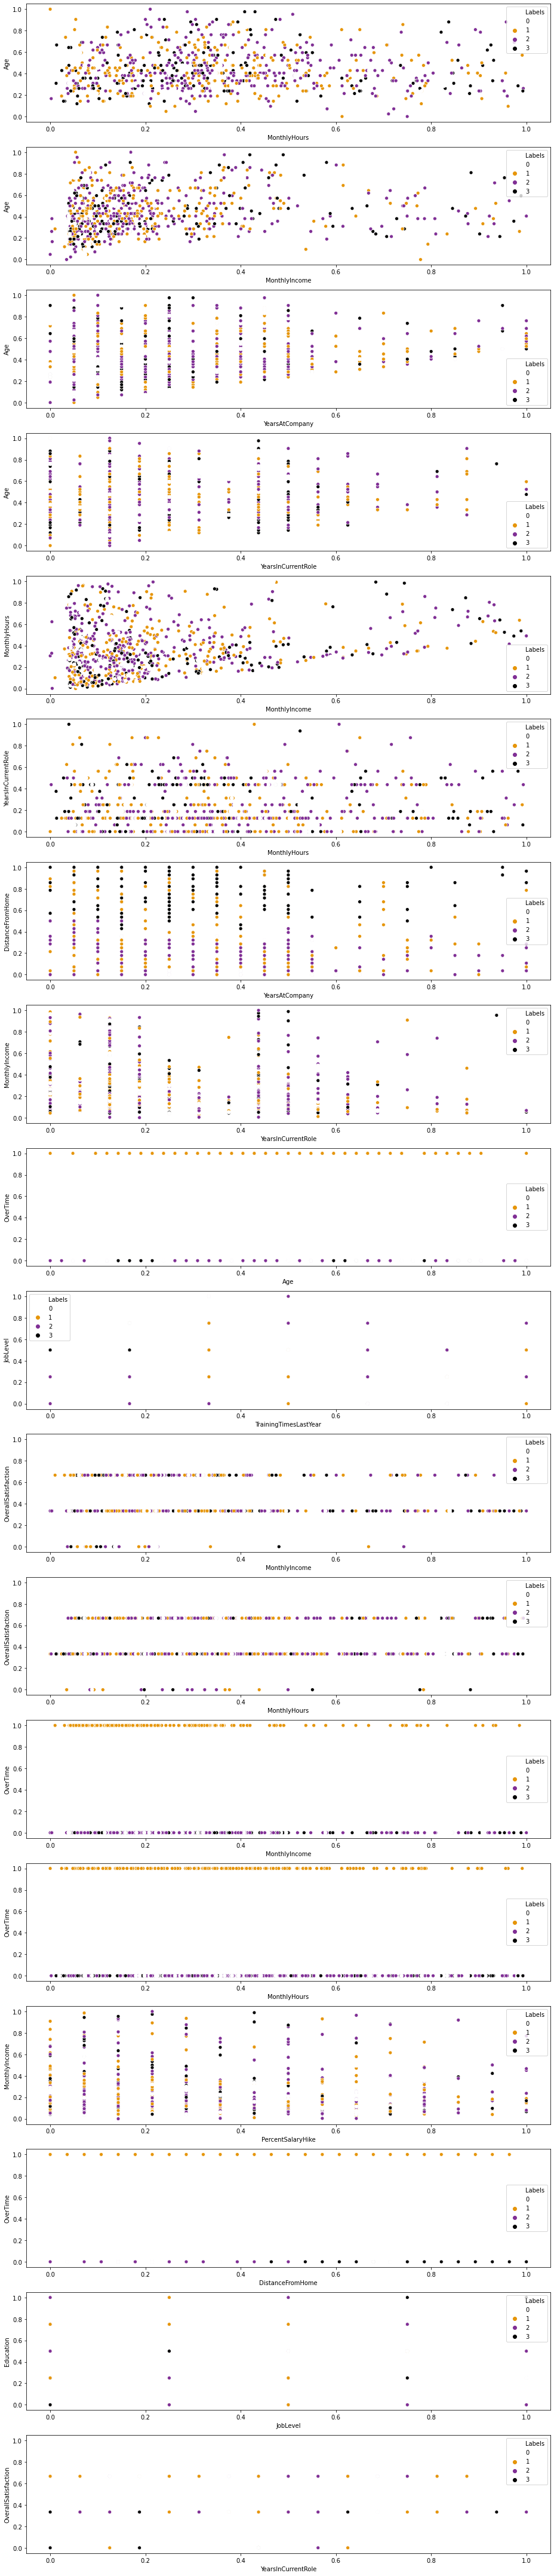

In [21]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,
     ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18) = plt.subplots(18, 1, figsize = (13,60))

sns.scatterplot(x = 'MonthlyHours', y = 'Age', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax1)

sns.scatterplot(x = 'MonthlyIncome', y = 'Age', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax2)

sns.scatterplot(x = 'YearsAtCompany', y = 'Age', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax3)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'Age', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax4)

sns.scatterplot(x = 'MonthlyIncome', y = 'MonthlyHours', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax5)

sns.scatterplot(x = 'MonthlyHours', y = 'YearsInCurrentRole', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax6)

sns.scatterplot(x = 'YearsAtCompany', y = 'DistanceFromHome', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax7)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'MonthlyIncome', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax8)

sns.scatterplot(x = 'Age', y = 'OverTime', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax9)

sns.scatterplot(x = 'TrainingTimesLastYear', y = 'JobLevel', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax10)

sns.scatterplot(x = 'MonthlyIncome', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax11)

sns.scatterplot(x = 'MonthlyHours', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax12)

sns.scatterplot(x = 'MonthlyIncome', y = 'OverTime', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax13)

sns.scatterplot(x = 'MonthlyHours', y = 'OverTime', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax14)

sns.scatterplot(x = 'PercentSalaryHike', y = 'MonthlyIncome', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax15)

sns.scatterplot(x = 'DistanceFromHome', y = 'OverTime', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax16)

sns.scatterplot(x = 'JobLevel', y = 'Education', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax17)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'OverallSatisfaction', data = df, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax18)

plt.tight_layout()
plt.show()

<h3>Non normalized dataset for centroid conversion</h3>

In [22]:
scaler = MinMaxScaler()

In [23]:
df_NON_normalized = pd.read_csv("Numerical_NON_NORMALIZED_Train_HR_Employee_Attrition.csv")

In [24]:
df_NON_normalized

Age  Attrition  BusinessTravel_Non-Travel  BusinessTravel_Travel_Rarely  \
0     52          0                          0                             1   
1     36          0                          0                             1   
2     25          0                          0                             0   
3     33          0                          0                             1   
4     31          0                          0                             1   
..   ...        ...                        ...                           ...   
878   38          1                          0                             1   
879   37          0                          0                             1   
880   33          1                          1                             0   
881   33          0                          0                             1   
882   45          0                          1                             0   

     BusinessTravel_Travel_Frequently  DistanceFromHome  Education  \
0                                   0                 9          4   
1                                   0                 1          1   
2                                   1                16          3   
3                                   0                 5          4   
4                                   0                 9          2   
..                                ...               ...        ...   
878                                 0                12          3   
879                                 0                16          2   
880                                 0                 6          4   
881                                 0                 4          1   
882                                 0                 3          4   

     EnvironmentSatisfaction  Gender  JobInvolvement  ...  PercentSalaryHike  \
0                          2       0               3  ...                 17   
1                          2       0               3  ...                 14   
2                          3       0               3  ...                 25   
3                          2       0               3  ...                 14   
4                          3       1               3  ...                 12   
..                       ...     ...             ...  ...                ...   
878                        3       1               4  ...                 15   
879                        4       1               4  ...                 13   
880                        2       1               1  ...                 18   
881                        3       0               2  ...                 12   
882                        1       0               3  ...                 16   

     RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                           3                 0                      2   
1                           3                 1                      3   
2                           3                 1                      4   
3                           2                 0                      1   
4                           3                 0                      2   
..                        ...               ...                    ...   
878                         4                 0                      2   
879                         2                 2                      3   
880                         2                 0                      2   
881                         1                 0                      2   
882                         4                 0                      2   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  MonthlyHours  \
0                  2               8                   7        156.61   
1                  3               1                   8        157.94   
2                  3               1                   5        448.06   
3                  3               3                   7 

In [25]:
df_NN = pd.DataFrame()

col_to_add = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',      
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'MonthlyHours',              
            'OverTime', 'OverallSatisfaction', 'JobLevel', 'NumCompaniesWorked','Education']

for element in col_to_add:
    df_NN[element] = df_NON_normalized[element]
    
df_NN

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0     52                 9           8446                 17   
1     36                 1           4834                 14   
2     25                16           4768                 25   
3     33                 5           2799                 14   
4     31                 9           6319                 12   
..   ...               ...            ...                ...   
878   38                12           5343                 15   
879   37                16           2115                 13   
880   33                 6           5147                 18   
881   33                 4           2500                 12   
882   45                 3           4385                 16   

     StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
0                   0                      2               8   
1                   1                      3               1   
2                   1                      4               1   
3                   0                      1               3   
4                   0                      2              10   
..                ...                    ...             ...   
878                 0                      2              10   
879                 2                      3              17   
880                 0                      2              11   
881                 0                      2               3   
882                 0                      2              10   

     YearsInCurrentRole  MonthlyHours  OverTime  OverallSatisfaction  \
0                     7        156.61         0                    2   
1                     8        157.94         1                    2   
2                     5        448.06         1                    3   
3                     7        271.91         0                    2   
4                     2        106.37         0                    3   
..                  ...           ...       ...                  ...   
878                   0        282.47         0                    3   
879                   0         76.29         1                    3   
880                   7        272.88         1                    2   
881                   2        208.67         0                    2   
882                   4        209.73         1                    2   

     JobLevel  NumCompaniesWorked  Education  
0           3                   9          4  
1           5                   1          1  
2           2                   1          3  
3           1                   2          4  
4           1                   1          2  
..        ...                 ...        ...  
878         1                   1          3  
879         1                   1          2  
880         2                   4          4  
881         2                   1          1  
882         2                   3          4  

[883 rows x 14 columns]

In [26]:
X = scaler.fit_transform(df_NN.values)

In [27]:
print(kmeans.cluster_centers_)

[[ 4.41088435e-01  1.94285714e-01  2.05466699e-01  3.13061224e-01
   2.68571429e-01  4.68571429e-01  3.04000000e-01  2.43214286e-01
   3.62420080e-01 -2.22044605e-16  4.38095238e-01  3.28571429e-01
   6.86984127e-01  5.55714286e-01]
 [ 4.34402332e-01  2.82653061e-01  2.27676510e-01  2.84256560e-01
   2.61224490e-01  4.22448980e-01  3.25714286e-01  2.39030612e-01
   3.52137666e-01  1.00000000e+00  4.51700680e-01  2.39795918e-01
   2.91156463e-01  4.70408163e-01]
 [ 4.44519317e-01  1.38814016e-01  2.29359003e-01  3.20754717e-01
   2.34800839e-01  4.50209644e-01  3.14308176e-01  2.37224843e-01
   3.89568559e-01  1.66533454e-16  4.39203354e-01  1.70597484e-01
   1.59329140e-01  4.34748428e-01]
 [ 4.49096880e-01  7.67241379e-01  2.52315923e-01  2.68472906e-01
   3.31034483e-01  4.39080460e-01  3.19655172e-01  2.74137931e-01
   3.57553259e-01 -1.66533454e-16  4.29885057e-01  2.24137931e-01
   2.49042146e-01  4.53448276e-01]]


In [28]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [29]:
print(centers)

[[ 3.65257143e+01  6.44000000e+00  6.34866857e+03  1.53828571e+01
   8.05714286e-01  2.81142857e+00  6.08000000e+00  3.89142857e+00
   2.30785600e+02 -2.22044605e-16  2.31428571e+00  2.31428571e+00
   6.18285714e+00  3.22285714e+00]
 [ 3.62448980e+01  8.91428571e+00  6.92585714e+03  1.49795918e+01
   7.83673469e-01  2.53469388e+00  6.51428571e+00  3.82448980e+00
   2.24976653e+02  1.00000000e+00  2.35510204e+00  1.95918367e+00
   2.62040816e+00  2.88163265e+00]
 [ 3.66698113e+01  4.88679245e+00  6.96958176e+03  1.54905660e+01
   7.04402516e-01  2.70125786e+00  6.28616352e+00  3.79559748e+00
   2.46122862e+02  1.66533454e-16  2.31761006e+00  1.68238994e+00
   1.43396226e+00  2.73899371e+00]
 [ 3.68620690e+01  2.24827586e+01  7.56618621e+03  1.47586207e+01
   9.93103448e-01  2.63448276e+00  6.39310345e+00  4.38620690e+00
   2.28036138e+02 -1.66533454e-16  2.28965517e+00  1.89655172e+00
   2.24137931e+00  2.81379310e+00]]


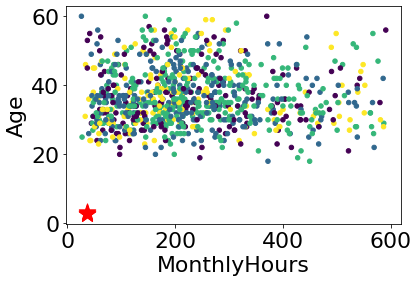

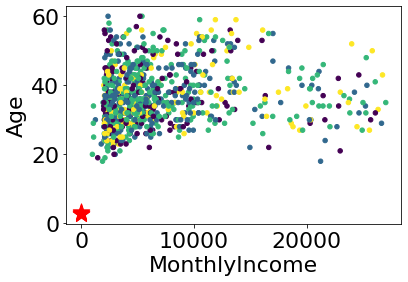

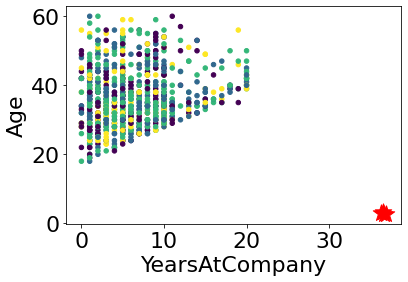

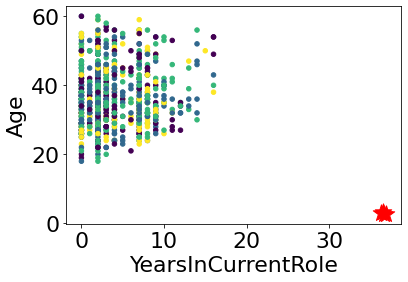

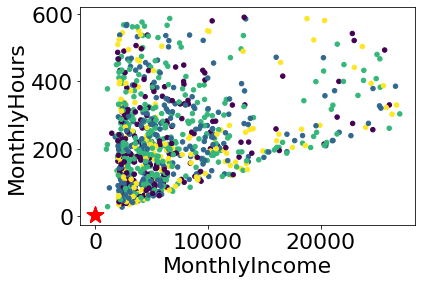

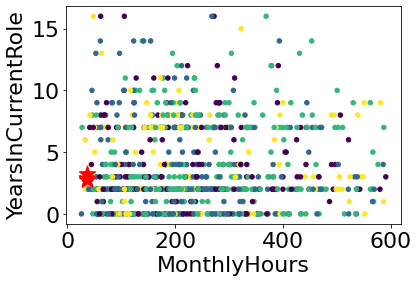

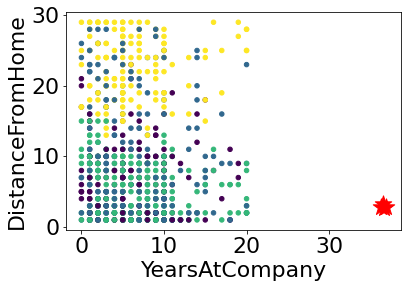

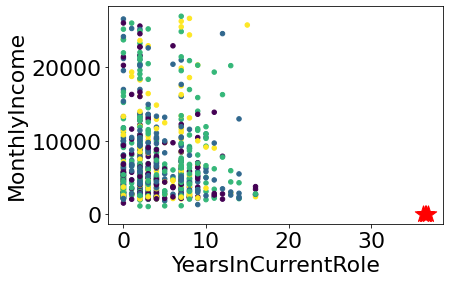

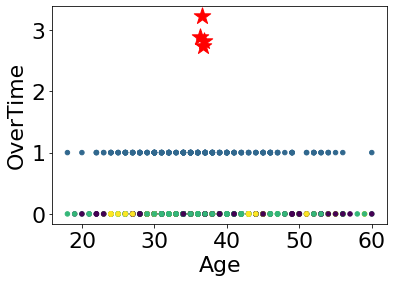

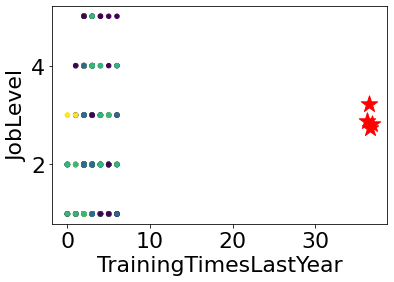

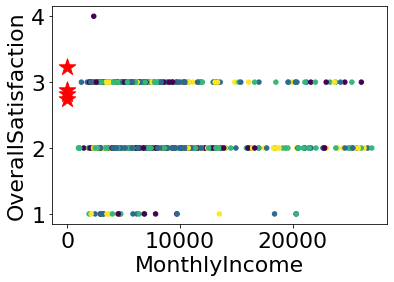

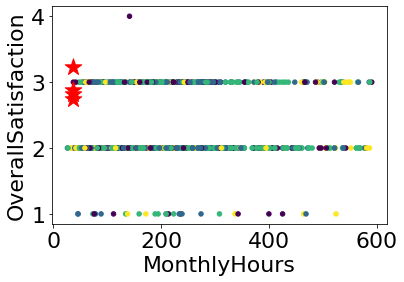

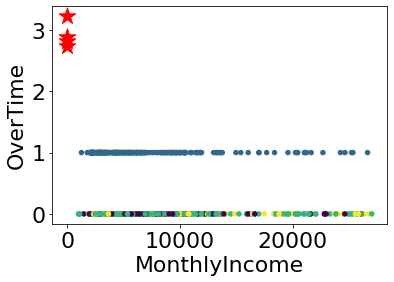

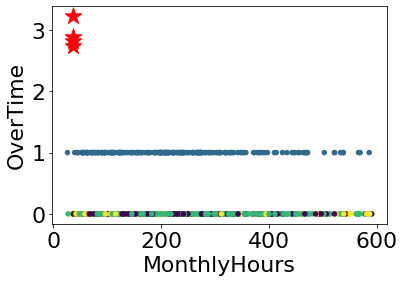

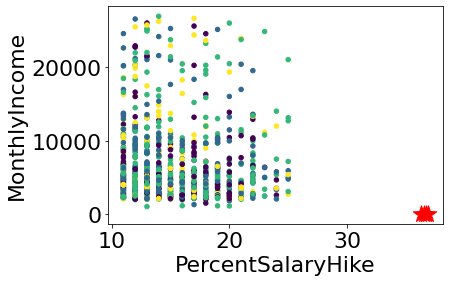

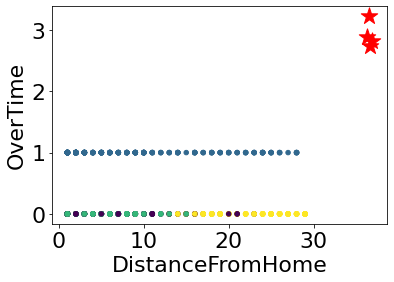

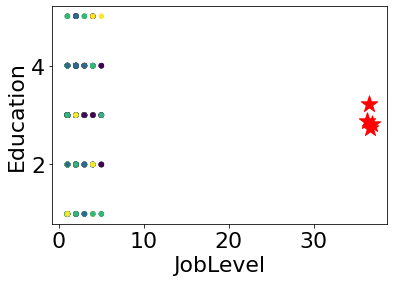

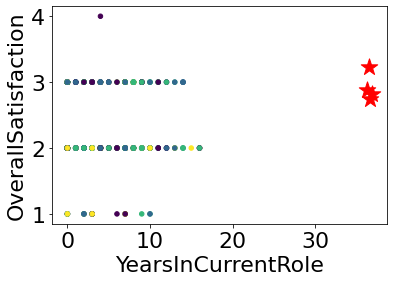

In [30]:
features_to_plot = [('MonthlyHours', 'Age'), ('MonthlyIncome', 'Age'),('YearsAtCompany', 'Age'), 
                    ('YearsInCurrentRole', 'Age'), ('MonthlyIncome', 'MonthlyHours'), 
                    ('MonthlyHours', 'YearsInCurrentRole'), ('YearsAtCompany', 'DistanceFromHome'),
                    ('YearsInCurrentRole', 'MonthlyIncome'), ('Age', 'OverTime'), 
                    ('TrainingTimesLastYear', 'JobLevel'), ('MonthlyIncome', 'OverallSatisfaction'), 
                    ('MonthlyHours', 'OverallSatisfaction'), ('MonthlyIncome', 'OverTime'),
                    ('MonthlyHours', 'OverTime'), ('PercentSalaryHike', 'MonthlyIncome'), 
                    ('DistanceFromHome', 'OverTime'),('JobLevel', 'Education'), 
                    ('YearsInCurrentRole', 'OverallSatisfaction')]

for a, b in features_to_plot:
    plt.scatter(df_NN[a], df_NN[b], c=kmeans.labels_, s=20)
    plt.scatter(centers[:, 0], centers[:, 13], s=300, marker='*', c='r')
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel(a, fontsize=22)
    plt.ylabel(b, fontsize=22)
    plt.show()

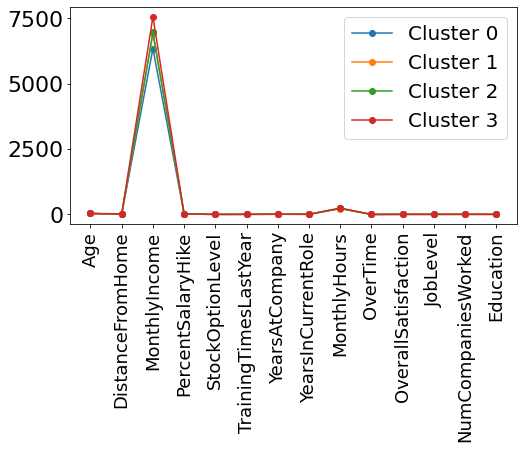

In [31]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_NN.columns)), df_NN.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

In [32]:
df_NN['Labels'] = df['Labels']

In [33]:
df_NN

Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
0     52                 9           8446                 17   
1     36                 1           4834                 14   
2     25                16           4768                 25   
3     33                 5           2799                 14   
4     31                 9           6319                 12   
..   ...               ...            ...                ...   
878   38                12           5343                 15   
879   37                16           2115                 13   
880   33                 6           5147                 18   
881   33                 4           2500                 12   
882   45                 3           4385                 16   

     StockOptionLevel  TrainingTimesLastYear  YearsAtCompany  \
0                   0                      2               8   
1                   1                      3               1   
2                   1                      4               1   
3                   0                      1               3   
4                   0                      2              10   
..                ...                    ...             ...   
878                 0                      2              10   
879                 2                      3              17   
880                 0                      2              11   
881                 0                      2               3   
882                 0                      2              10   

     YearsInCurrentRole  MonthlyHours  OverTime  OverallSatisfaction  \
0                     7        156.61         0                    2   
1                     8        157.94         1                    2   
2                     5        448.06         1                    3   
3                     7        271.91         0                    2   
4                     2        106.37         0                    3   
..                  ...           ...       ...                  ...   
878                   0        282.47         0                    3   
879                   0         76.29         1                    3   
880                   7        272.88         1                    2   
881                   2        208.67         0                    2   
882                   4        209.73         1                    2   

     JobLevel  NumCompaniesWorked  Education  Labels  
0           3                   9          4       0  
1           5                   1          1       1  
2           2                   1          3       1  
3           1                   2          4       2  
4           1                   1          2       2  
..        ...                 ...        ...     ...  
878         1                   1          3       2  
879         1                   1          2       1  
880         2                   4          4       1  
881         2                   1          1       2  
882         2                   3          4       1  

[883 rows x 15 columns]

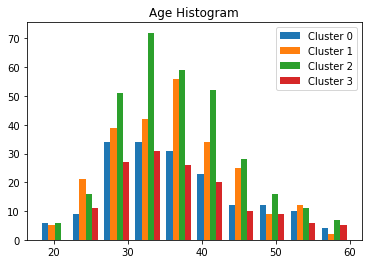

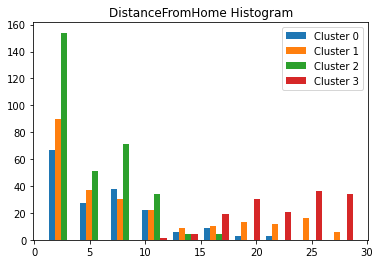

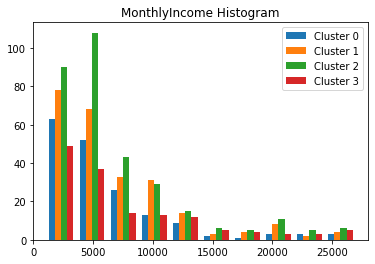

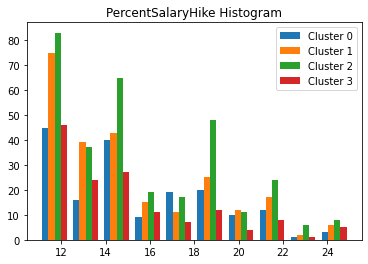

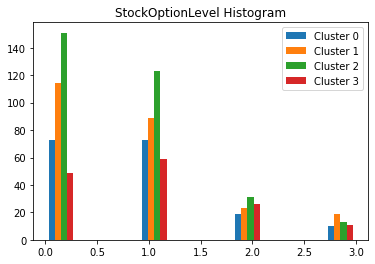

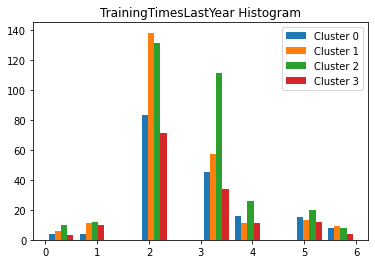

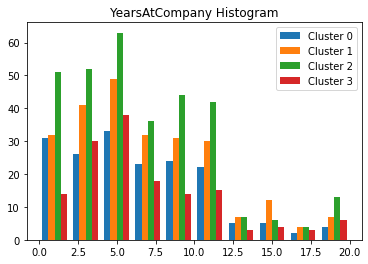

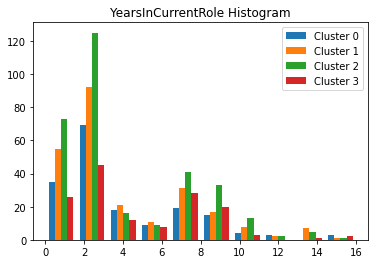

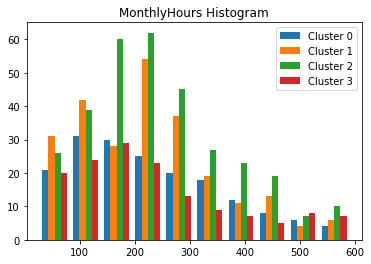

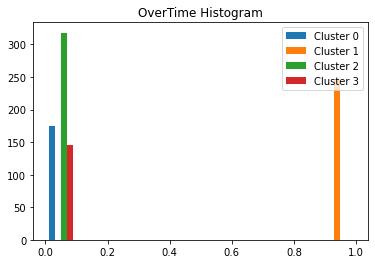

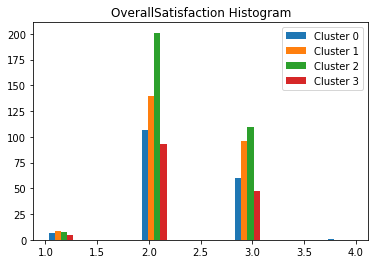

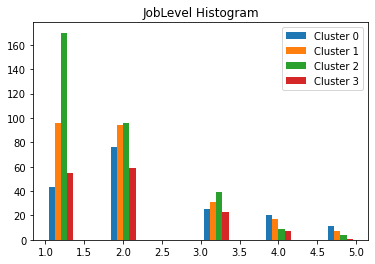

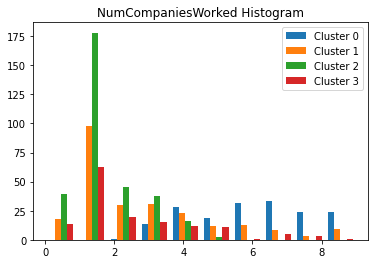

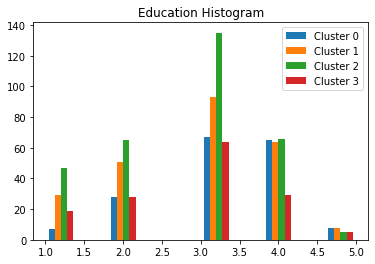

In [35]:
for column in df_NN.columns:
    if column != 'Labels':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df_NN['Labels']):
            cluster_list.append(df_NN[df_NN['Labels'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

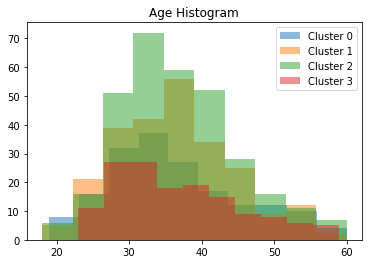

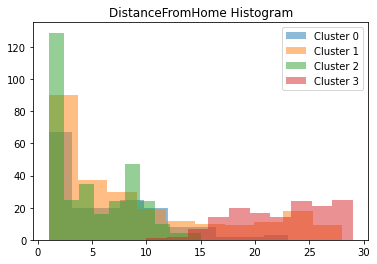

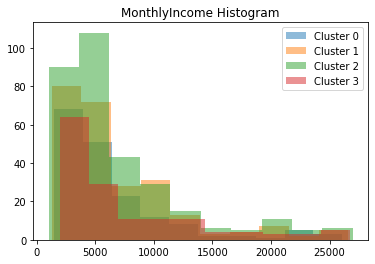

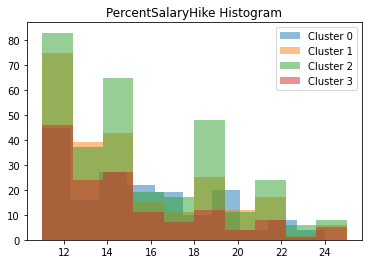

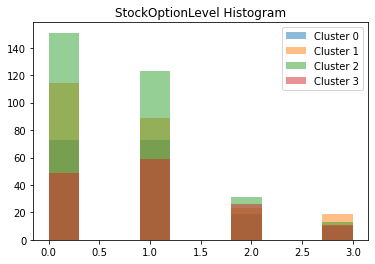

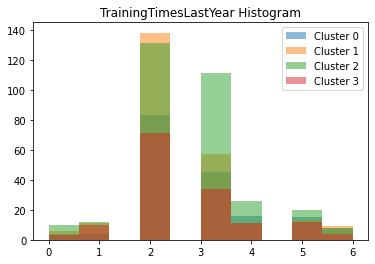

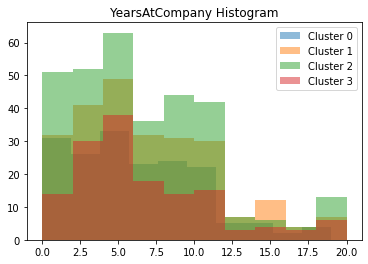

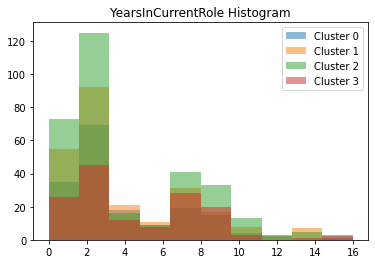

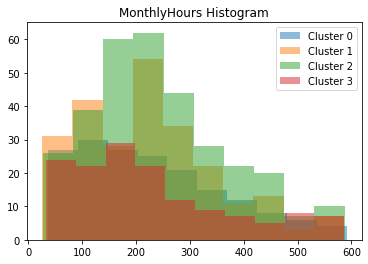

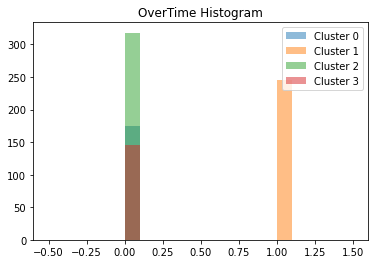

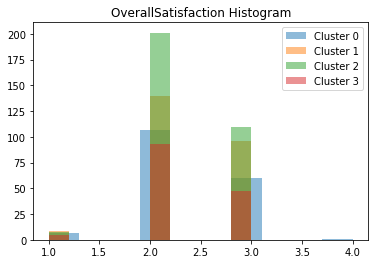

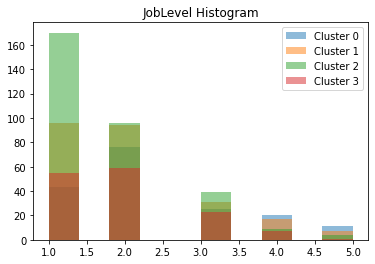

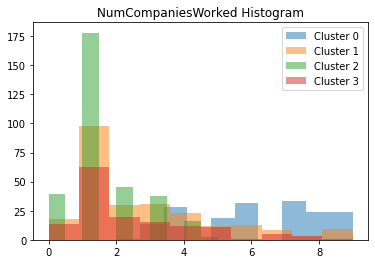

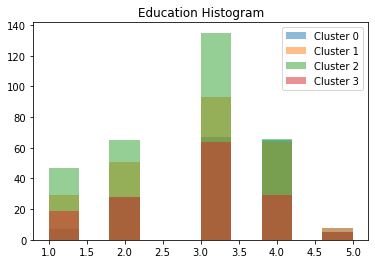

In [36]:
for column in df_NN.columns:
    if column != 'Labels':
    
        for num_cluster in np.unique(df_NN['Labels']):
            plt.hist(df_NN[df_NN['Labels'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

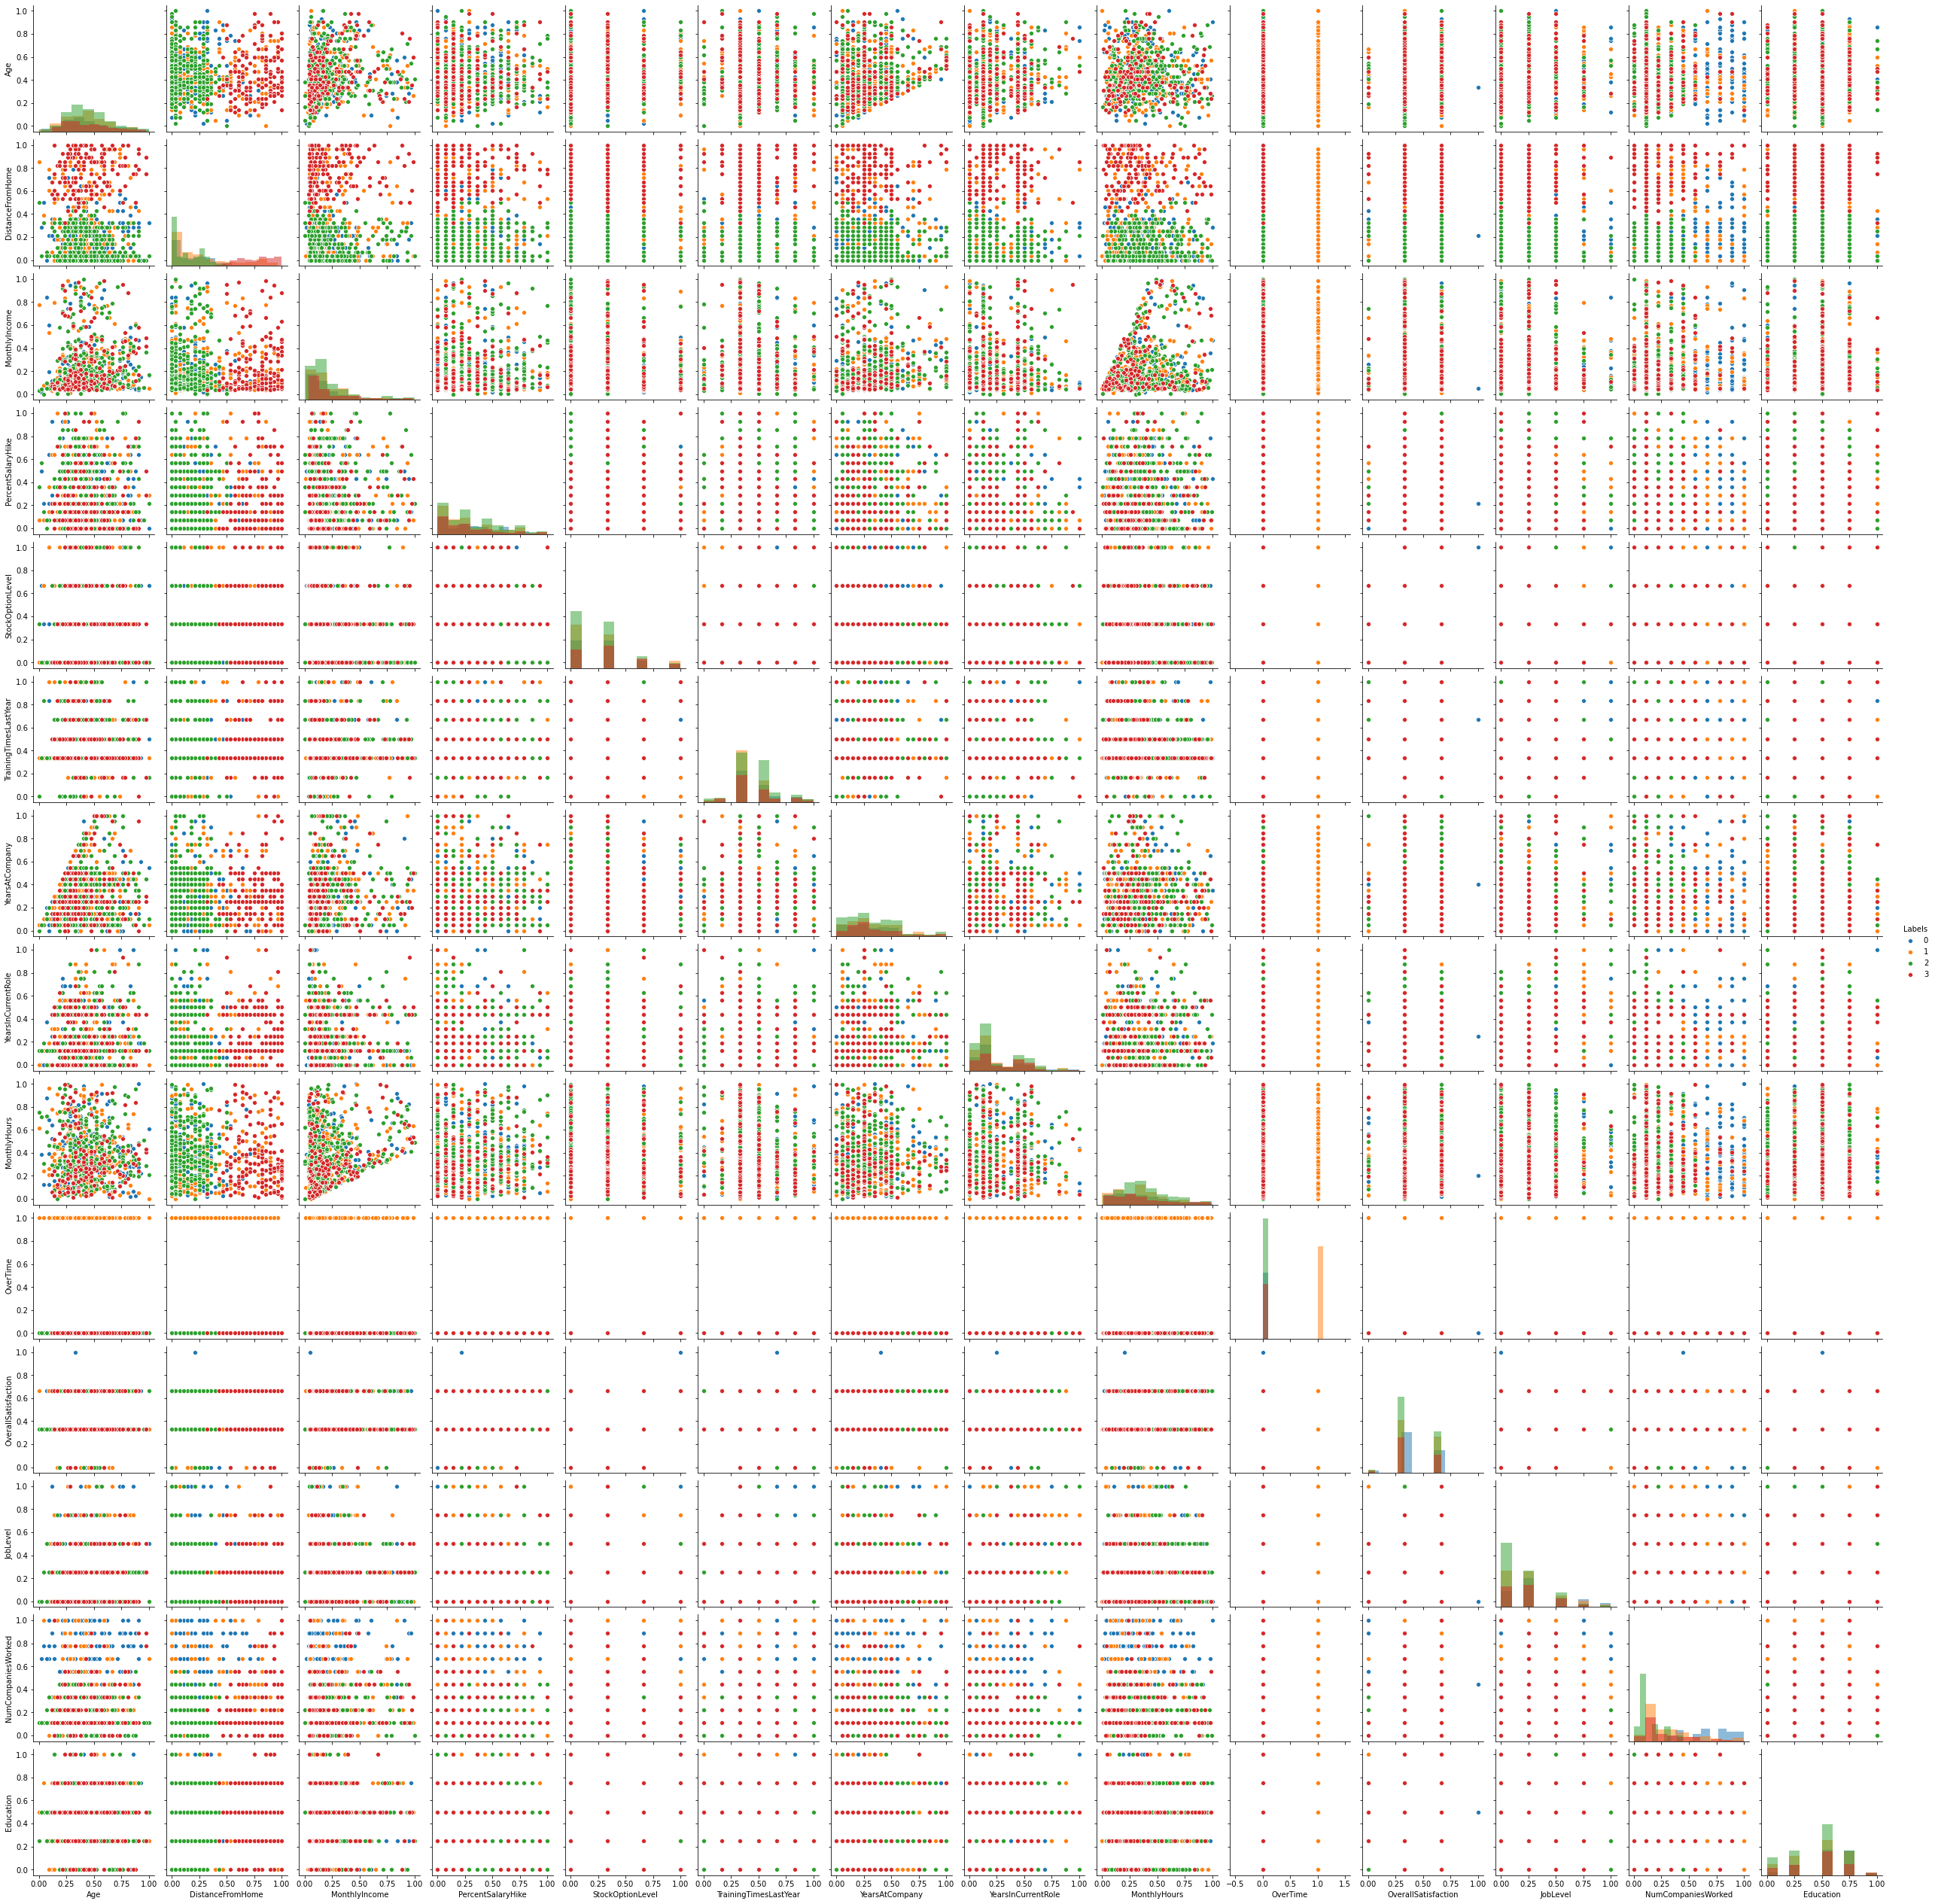

In [37]:
sns.pairplot(df, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")

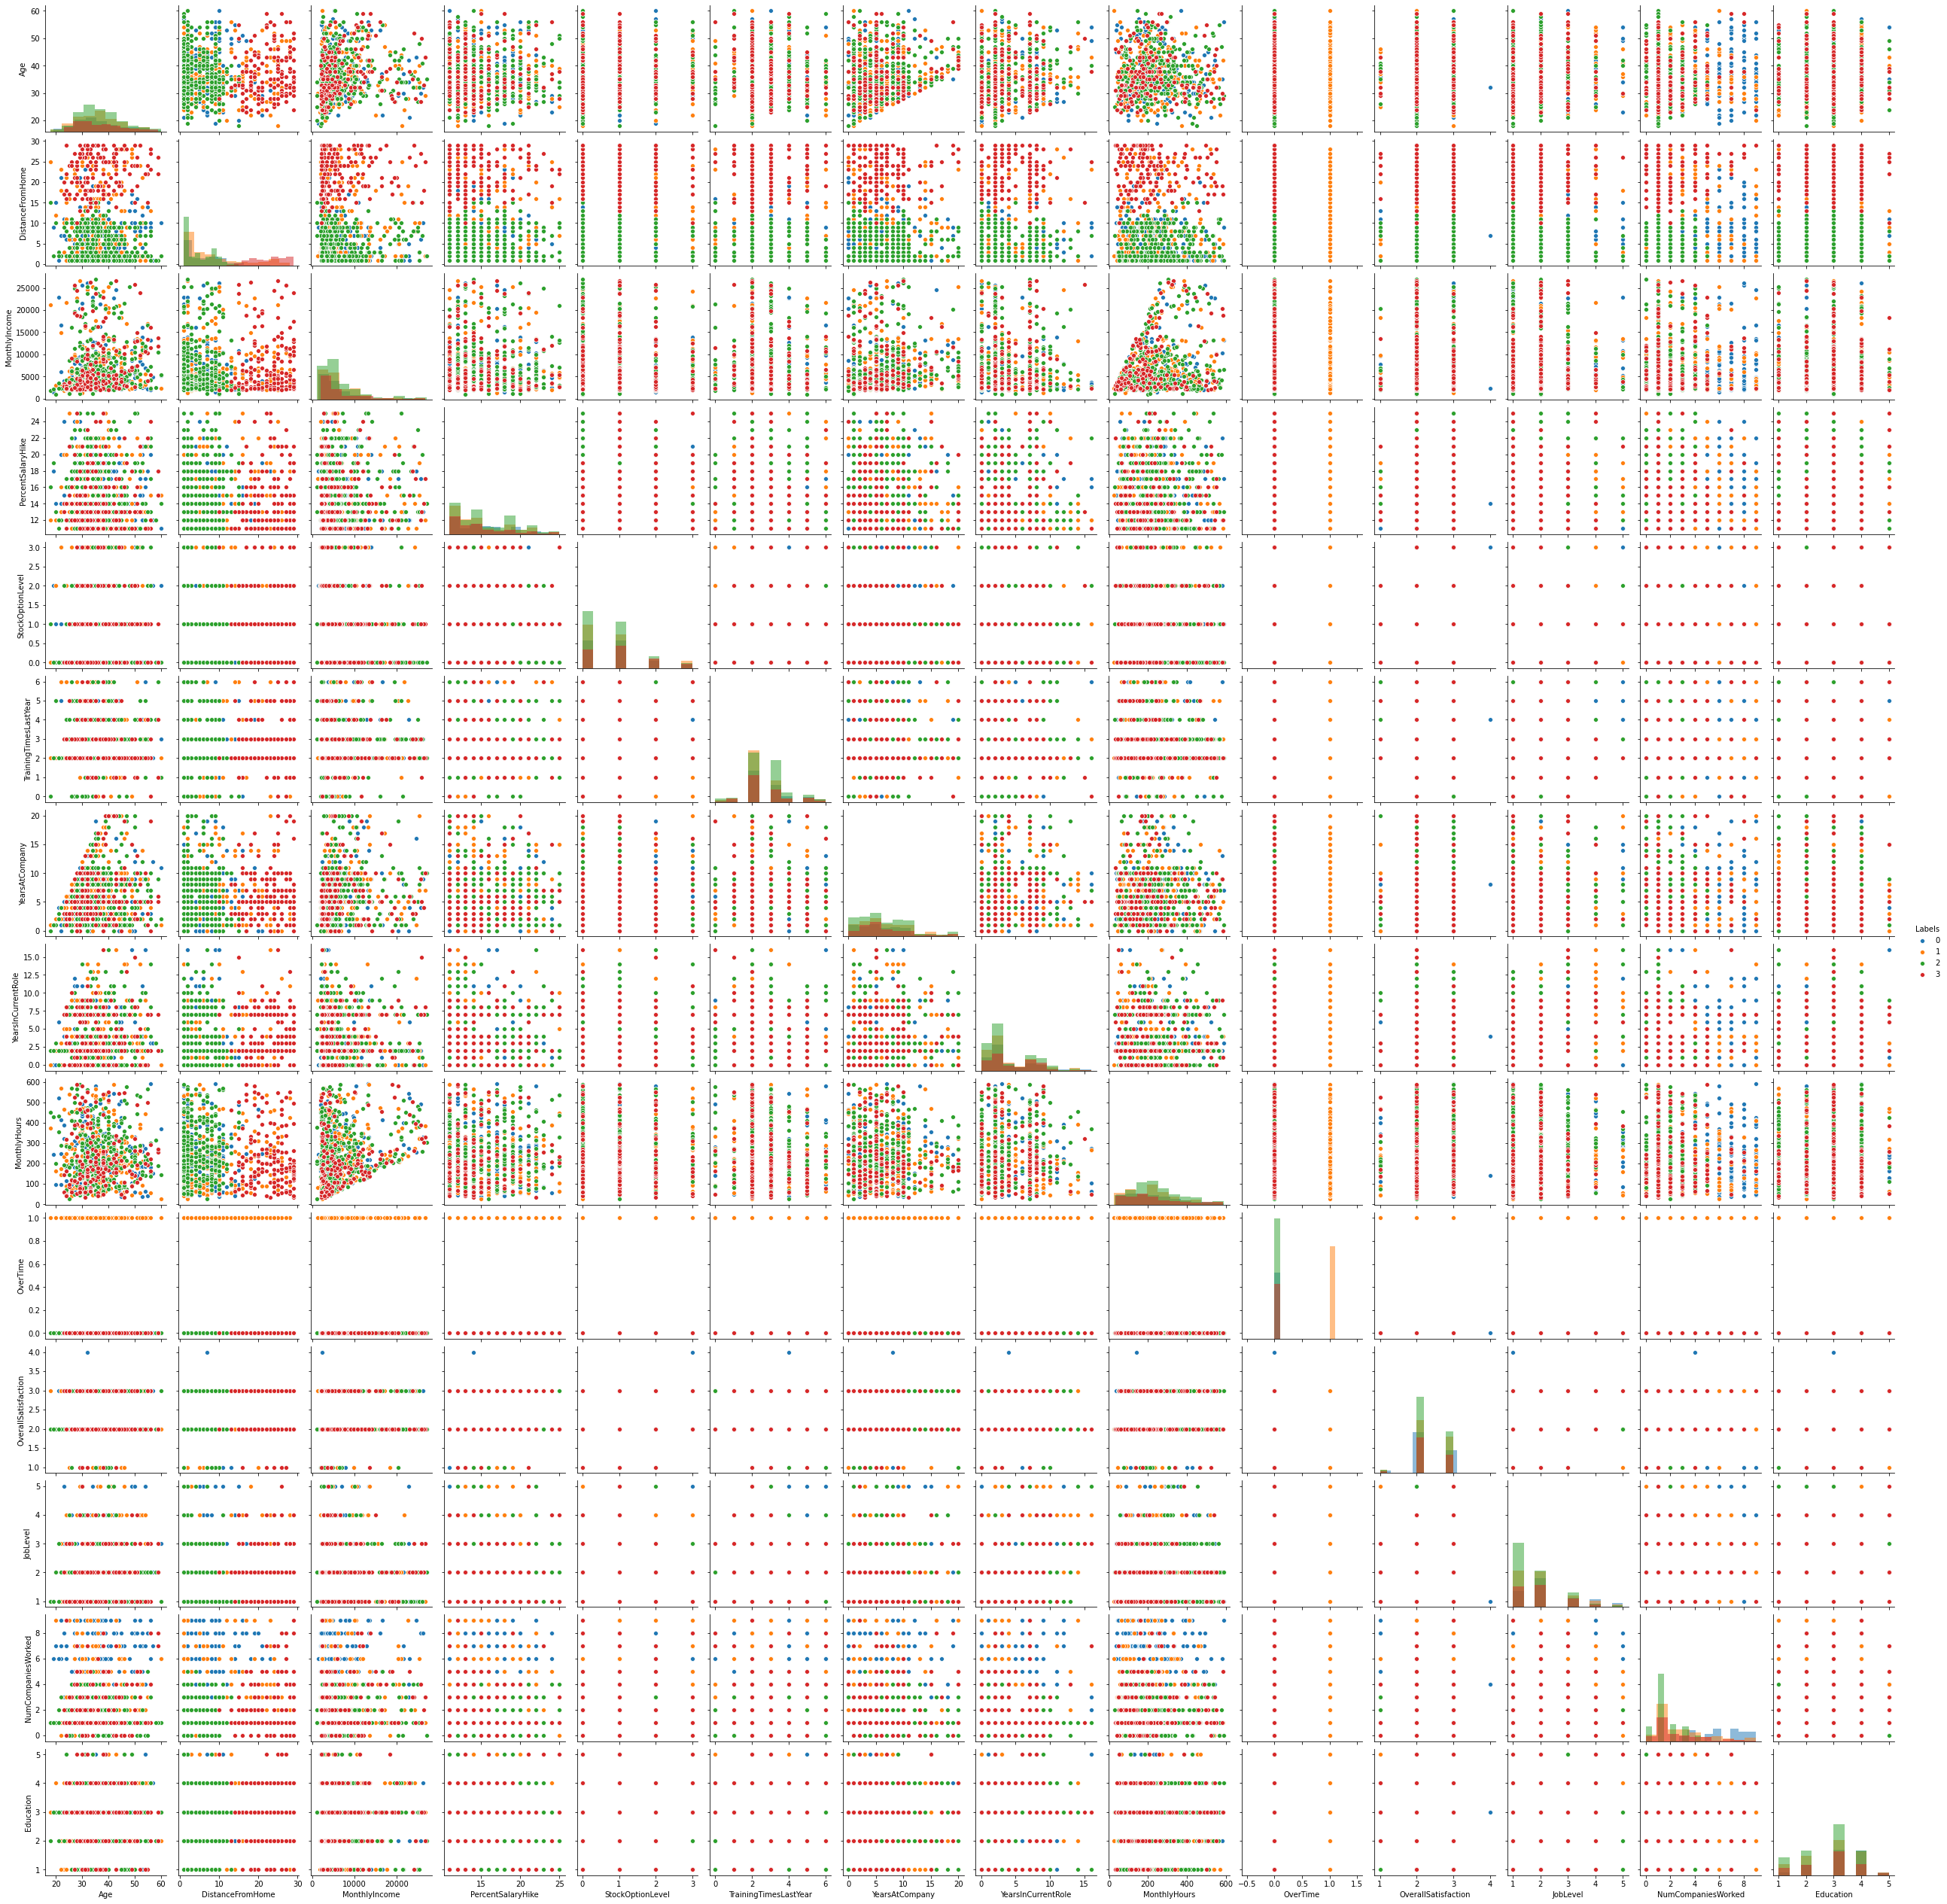

In [38]:
sns.pairplot(df_NN, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")